<a href="https://colab.research.google.com/github/juandsalazars/pandas-training/blob/main/Medical_data_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Data Visualizer - freecodecamp.org

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### Draw a split plot of counts of "Presence or absence of cardiovascular disease"(cardio) given the other variables

First, let's create a new column that shows if by the BMI the person is `overweight`. Let's normalize the value so that 0 is not overweight and 1 is.

In [17]:
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2 > 25).astype(int)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


Now, let's also normalize the values of `cholesterol` and `gluc` so that if they are bigger than 1, then it is 1, else it's going to be 0.

In [18]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


Now, with the values normalized, let's draw a plot that shows the presence or absence of cardiovascular disease in relation with the other variables.

For that, let's first write the df in long form:

In [26]:
df_cat = pd.melt(
    df, id_vars=['cardio'],
    value_vars=[
      'active',
      'alco',
      'cholesterol',
      'gluc',
      'overweight',
      'smoke'
    ],
    var_name='Variable',
    value_name='Value'
)
df_cat = df_cat.groupby(['cardio', 'Variable', 'Value'], as_index=False).size()
df_cat = df_cat.rename(columns={'size': 'count'})
df_cat.head()

,cardio,Variable,Value,count
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330


With the df in long form, let's create the image:

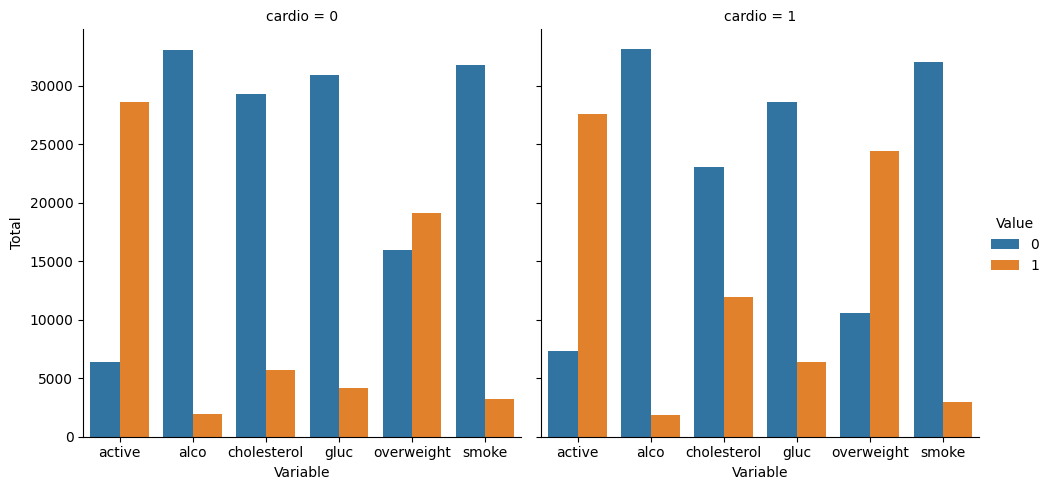

In [29]:
sns_output = sns.catplot(
    x='Variable',
    y='count',
    col='cardio',
    hue='Value',
    data=df_cat,
    kind='bar',
)

for ax in sns_output.axes.flat:
  ax.set_ylabel('Total')

sns_output

### Draw a heat map showing the correlation

To draw the heat map, let's first clean the data in the df.

We'll remove the values that:
- Diastolic pressure is higher than systolic.
- Height is less than the 2.5th percentile.
- Height is more than the 97.5th percentile.
- Weight is less than the 2.5th percentile.
- Weight is more than the 97.5th percentile.

In [33]:
df_heat_map = df[
    (df['ap_lo'] < df['ap_hi']) &
    (df['height'].quantile(0.025) <= df['height']) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'].quantile(0.025) <= df['weight']) &
    (df['weight'] <= df['weight'].quantile(0.975))
]
df_heat_map.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


Now, let's make the correlation between the variables and graph it. Also, let's use a mask to show only the bottom triangle:

<Axes: >

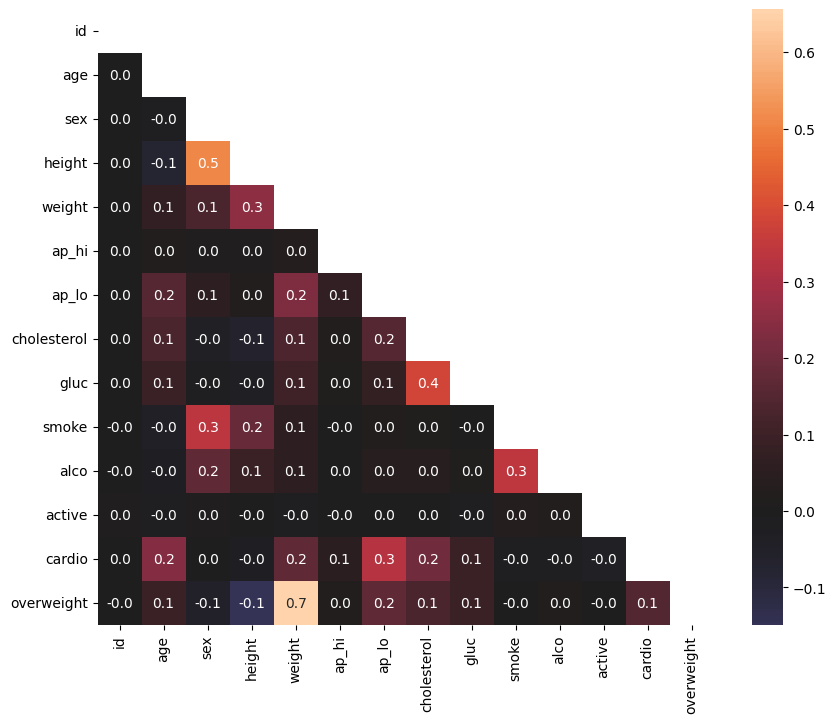

In [44]:
corr = df_heat_map.corr()

mask = np.triu(np.ones_like(corr)).astype(bool)

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    center=0,
    ax=ax,
    square=True,
    fmt='.1f'
)